In [2]:
# 阿里天池新人赛案例之一
# “Pandas揭秘美国选民的总统喜好”

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

In [3]:
# 设置中文字体
font = {'family': 'MicroSoft YaHei',
        'weight': 'bold',
        'size': 10}
matplotlib.rc("font", **font)

In [4]:
# 候选人信息
weball = pd.read_csv(r'd:\TianChi_DataSet\weball20.txt',
                     sep='|',
                     names=['CAND_ID', 'CAND_NAME', 'CAND_ICI', 'PTY_CD', 'CAND_PTY_AFFILIATION', 'TTL_RECEIPTS',
                            'TRANS_FROM_AUTH', 'TTL_DISB', 'TRANS_TO_AUTH', 'COH_BOP', 'COH_COP', 'CAND_CONTRIB',
                            'CAND_LOANS', 'OTHER_LOANS', 'CAND_LOAN_REPAY', 'OTHER_LOAN_REPAY', 'DEBTS_OWED_BY',
                            'TTL_INDIV_CONTRIB', 'CAND_OFFICE_ST', 'CAND_OFFICE_DISTRICT', 'SPEC_ELECTION', 'PRIM_ELECTION', 'RUN_ELECTION',
                            'GEN_ELECTION', 'GEN_ELECTION_PRECENT', 'OTHER_POL_CMTE_CONTRIB', 'POL_PTY_CONTRIB',
                            'CVG_END_DT', 'INDIV_REFUNDS', 'CMTE_REFUNDS'])

In [5]:
# 候选人与委员会的联系信息
ccl = pd.read_csv(r'd:\TianChi_DataSet\ccl.txt',
                  sep='|',
                  names=['CAND_ID', 'CAND_ELECTION_YR', 'FEC_ELECTION_YR',
                         'CMTE_ID', 'CMTE_TP', 'CMTE_DSGN', 'LINKAGE_ID'])

In [6]:
# 合并两表
merge_w_c = pd.merge(ccl, weball)
# 取得关键列
data1 = pd.DataFrame(merge_w_c, columns=['CMTE_ID', 'CAND_ID', 'CAND_NAME', 'CAND_PTY_AFFILIATION'])

In [7]:
# 个人捐赠数据
itcont = pd.read_csv(r'd:\TianChi_DataSet\itcont_2020_20200618_20200629.txt',
                     sep='|',
                     names=['CMTE_ID', 'AMNDT_IND', 'RPT_TP', 'TRANSACTION_PGI',
                            'IMAGE_NUM', 'TRANSACTION_TP', 'ENTITY_TP', 'NAME', 'CITY',
                            'STATE', 'ZIP_CODE', 'EMPLOYER', 'OCCUPATION', 'TRANSACTION_DT',
                            'TRANSACTION_AMT', 'OTHER_ID', 'TRAN_ID', 'FILE_NUM', 'MEMO_CD',
                            'MEMO_TEXT', 'SUB_ID'])

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10,15,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
merge_c_i = pd.merge(data1, itcont)
data2 = pd.DataFrame(merge_c_i, columns=['CAND_NAME', 'NAME', 'STATE', 'EMPLOYER', 'OCCUPATION',
                                           'TRANSACTION_AMT', 'TRANSACTION_DT', 'CAND_PTY_AFFILIATION'])

In [9]:
data2['STATE'].fillna('NOT PROVIDED',inplace=True)
data2['EMPLOYER'].fillna('NOT PROVIDED',inplace=True)
data2['OCCUPATION'].fillna('NOT PROVIDED',inplace=True)

In [10]:
data2['TRANSACTION_DT'].head()

0    6242020
1    6202020
2    6242020
3    6232020
4    6242020
Name: TRANSACTION_DT, dtype: int64

In [11]:
# 日期列的int类型转换为str类型，方便下面的处理
data2['TRANSACTION_DT'] = data2['TRANSACTION_DT'].astype(str)

In [12]:
data2['TRANSACTION_DT'] = [i[3:7]+i[0]+i[1:3] for i in data2['TRANSACTION_DT'] ]

In [13]:
# 选出拜登的数据
biden = data2[data2['CAND_NAME']=='BIDEN, JOSEPH R JR']

In [14]:
# 统计各州对拜登的捐款
biden_state = biden.groupby('STATE').sum().sort_values("TRANSACTION_AMT", ascending=False)

In [15]:
b=np.array(biden_state) #创建ndarray 对象
number_b=len(b)   #支持拜州的数量

In [16]:
# 选出特朗普的数据
trump = data2[data2['CAND_NAME']=='TRUMP, DONALD J.']

In [17]:
trump_state = trump.groupby('STATE').sum().sort_values("TRANSACTION_AMT", ascending=False)
t=np.array(trump_state)  #创建ndarray 对象
number_t=len(t)  #支持特朗州的数量
print(number_t)

55


In [18]:
#pivot_table作用是按州和捐赠数额聚合数据,index=['STATE']取出捐赠人所在的州，values=['TRANSACTION_AMT']取出捐赠人捐赠的数额，aggfunc='sum'计算相同州的总额
by_state=pd.pivot_table(data2,index=['STATE'],values=['TRANSACTION_AMT'],aggfunc='sum')                                                                                                 
number=len(by_state)  #州的数量

In [19]:
by_state.head()

,TRANSACTION_AMT
STATE,
AA,2425
AE,13804
AK,299029
AL,766754
AP,1604


In [20]:
# 从所有数据中取出支持拜的数据
# 统计各职业对拜的捐款总数
biden_occupation = biden.groupby('OCCUPATION').sum().sort_values("TRANSACTION_AMT", ascending=False)
e=np.array(biden_occupation)   #创建biden ndarray 对象

# 从所有数据中取出支持特朗的数据
# 统计各职业对特朗的捐款总数
trump_occupation = trump.groupby('OCCUPATION').sum().sort_values("TRANSACTION_AMT", ascending=False)  
r=np.array(trump_occupation)    #创建trump ndarray 对象

In [21]:
#pivot_table作用是按职业和捐赠数额聚合数据,index=['OCCUPATION']取出捐赠人所在的职业，values=['TRANSACTION_AMT']取出捐赠人捐赠的数额，aggfunc='sum'计算相同职业的总额
by_occupation=pd.pivot_table(data2,index=['OCCUPATION'],values=['TRANSACTION_AMT'],aggfunc='sum')                                                                                                 
number_j=len(by_occupation) #职业的总数量

In [22]:
print('州的总数:{}'.format(number))
print('支持拜登的州数量:{}'.format(number_b))
print('支持特朗的州数量:{}'.format(number_t))

print('职业的总数:{}'.format(number_j))
print('支持拜登的职业数量：{}'.format(len(e)))
print('支持特朗的职业数量:{}'.format(len(r)))

州的总数:62
支持拜登的州数量:62
支持特朗的州数量:55
职业的总数:18858
支持拜登的职业数量：7480
支持特朗的职业数量:3005


In [23]:
date_money_biden = pd.pivot_table(biden, index=['TRANSACTION_DT'], values=['TRANSACTION_AMT'], aggfunc='sum')
date_money_biden.head(8)

,TRANSACTION_AMT
TRANSACTION_DT,
2020618,869870
2020619,877837
2020620,722863
2020621,765920
2020622,1245295
2020623,2237940
2020624,1218119
2020625,924652


In [24]:
date_money_trump = pd.pivot_table(trump, index=['TRANSACTION_DT'], values=['TRANSACTION_AMT'], aggfunc='sum')

In [25]:
x = date_money_biden.index

In [26]:
y_biden = date_money_biden['TRANSACTION_AMT'].values
y_trump = date_money_trump['TRANSACTION_AMT'].values

In [27]:
y_1 = [sum(y_biden[0:i+1]) for i in range(0,12)]
y_2 = [sum(y_trump[0:i+1]) for i in range(0,12)]

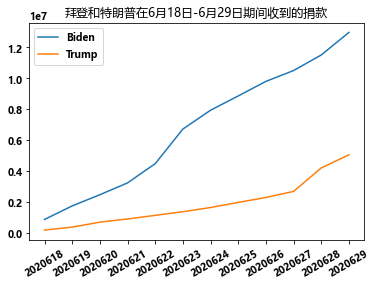

In [28]:
plt.plot(x, y_1, label='Biden')
plt.plot(x, y_2, label='Trump')
plt.title('拜登和特朗普在6月18日-6月29日期间收到的捐款')
plt.legend()
plt.xticks(rotation=30)
plt.show()

- 使用香农公式和基尼系数预测拜登和特朗普的胜率
- 拜登-->62州62支持
-    -->18858职业7480支持
- 特朗普-->62州55支持
-     -->18858职业3005支持

- -------信息熵计算公式---------
$$
entropy = -\sum_{i=1}^{n}p(i)log_{2}^{p(i)}
$$


- 香农计算拜登胜率如下
- entropy_b = -((62/62)*math.log((62/62),2)+(0/62)*math.log((0/62),2))
- entropy=0
- 拜登香农胜率1-0=100%

- 香农计算特朗普胜率如下
- entropy_t = -((55/62)*math.log((55/62),2)+(7/62)*math.log((7/62),2))

In [31]:
entropy_t = -((55/62)*math.log((55/62),2)+(7/62)*math.log((7/62),2))
entropy_t

0.5086113313826897

In [33]:
# Biden的州信息熵胜率1-0=100%
# Trump的州信息熵胜率1-0.5086=49.14%

# 下面计算两人职业信息熵胜率
e_biden_occup = -((7480/18858)*math.log((7480/18858),2)+(11378/18858)*math.log((11378/18858),2))
e_trump_occup = -((3005/18858)*math.log((3005/18858),2)+(15853/18858)*math.log((15853/18858),2))
print('biden',e_biden_occup)
print('trump',e_trump_occup)

biden 0.9689563831858323
trump 0.6327494409557352


In [35]:
# 综合胜率
bi = (1+0.96)/2
tr = (0.49+0.63)/2
print('数据预测biden当选总统胜率：'+str(bi*100),'%')
print('数据预测trump当选总统胜率：'+str(tr*100)[0:5],'%')

数据预测biden当选总统胜率：98.0 %
数据预测trump当选总统胜率：56.00 %
